**ANALYSIS USING DESCRIPTIVE STATISTICS**



In [2]:
# importing libraties to use 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 


In [3]:
# reading csv data using pandas 
from google.colab import files 
import io
uploaded = files.upload()
covid = pd.read_csv(io.BytesIO(uploaded['project_data.csv']))


Saving project_data.csv to project_data (1).csv


In [4]:
covid.head()

,Unnamed: 0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pop_dens,continent,covid_deaths
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,49,AS,104.0
1,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,99,EU,854.0
2,3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,18,AF,81.0
3,4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,23,AF,25.0
4,5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,235,NAM,425.0


In [5]:
covid.shape


(148, 14)

In [6]:
# having a look at values per column 
# checking for missing values
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    148 non-null    int64  
 1   country       148 non-null    object 
 2   child_mort    148 non-null    float64
 3   exports       148 non-null    float64
 4   health        148 non-null    float64
 5   imports       148 non-null    float64
 6   income        148 non-null    int64  
 7   inflation     148 non-null    float64
 8   life_expec    148 non-null    float64
 9   total_fer     148 non-null    float64
 10  gdpp          148 non-null    int64  
 11  pop_dens      148 non-null    int64  
 12  continent     148 non-null    object 
 13  covid_deaths  148 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 16.3+ KB


In [7]:
# values per each continent
covid["continent"].value_counts()

AF     42
AS     39
EU     37
NAM    15
SA     11
OC      3
oc      1
Name: continent, dtype: int64

In [8]:
covid.describe()

,Unnamed: 0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pop_dens,covid_deaths
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,74.500000,39.018243,39.847966,6.749932,44.702472,17055.155405,8.216547,70.622297,2.959932,13259.425676,159.081081,654.797973
std,42.868014,40.733837,24.545663,2.656756,21.816760,19226.671828,10.976602,9.029557,1.544196,18950.692883,264.763751,856.200928
min,1.000000,2.600000,0.109000,1.810000,0.065900,609.000000,-3.220000,32.100000,1.230000,231.000000,2.000000,0.300000
25%,37.750000,7.875000,23.550000,4.960000,29.475000,3357.500000,1.985000,65.300000,1.797500,1310.000000,26.500000,34.750000
50%,74.500000,19.750000,35.200000,6.215000,42.800000,9945.000000,5.470000,73.150000,2.375000,4670.000000,74.000000,284.500000
75%,111.250000,62.300000,51.225000,8.327500,56.800000,22750.000000,11.125000,77.200000,3.907500,13775.000000,174.500000,1099.250000
max,148.000000,208.000000,175.000000,17.900000,154.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,1913.000000,5692.000000


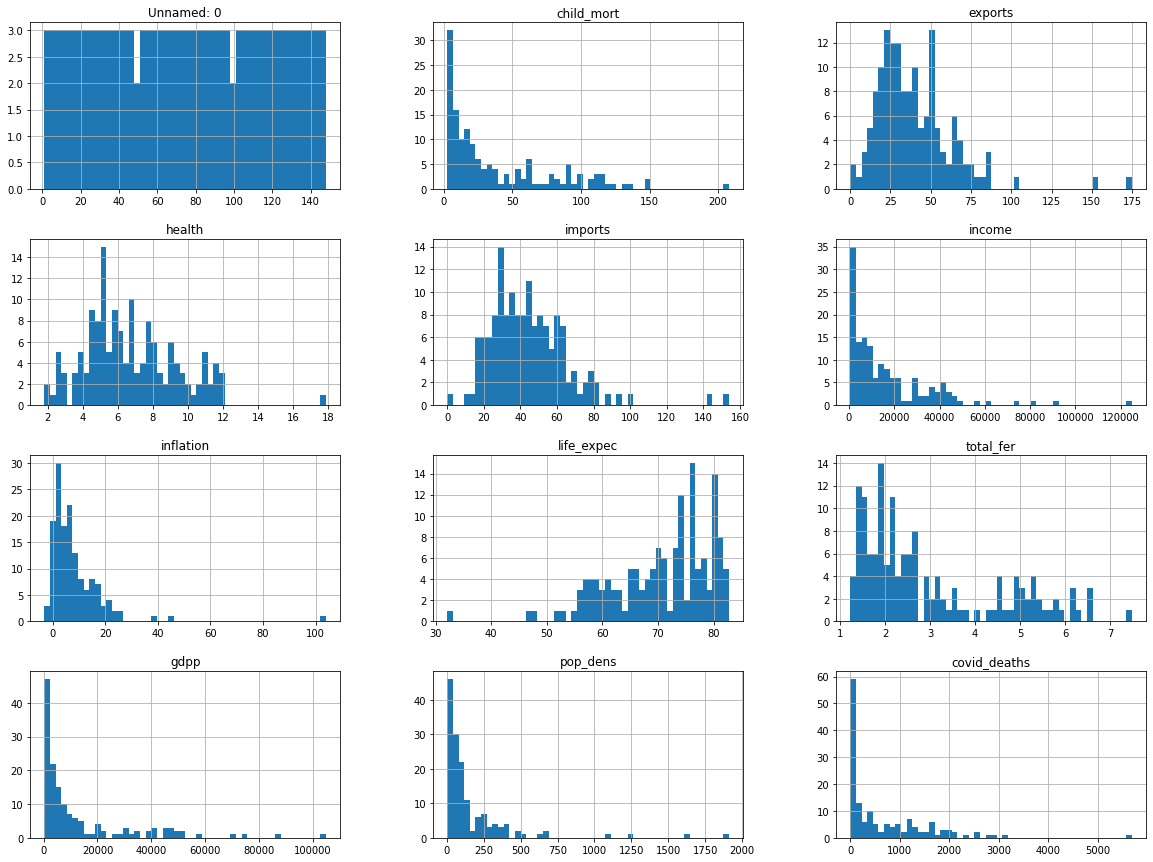

In [9]:
# plottng the data using a histogram to show the number of instances on the y and x given range 
covid.hist(bins=50, figsize=(20,15))
plt.show()

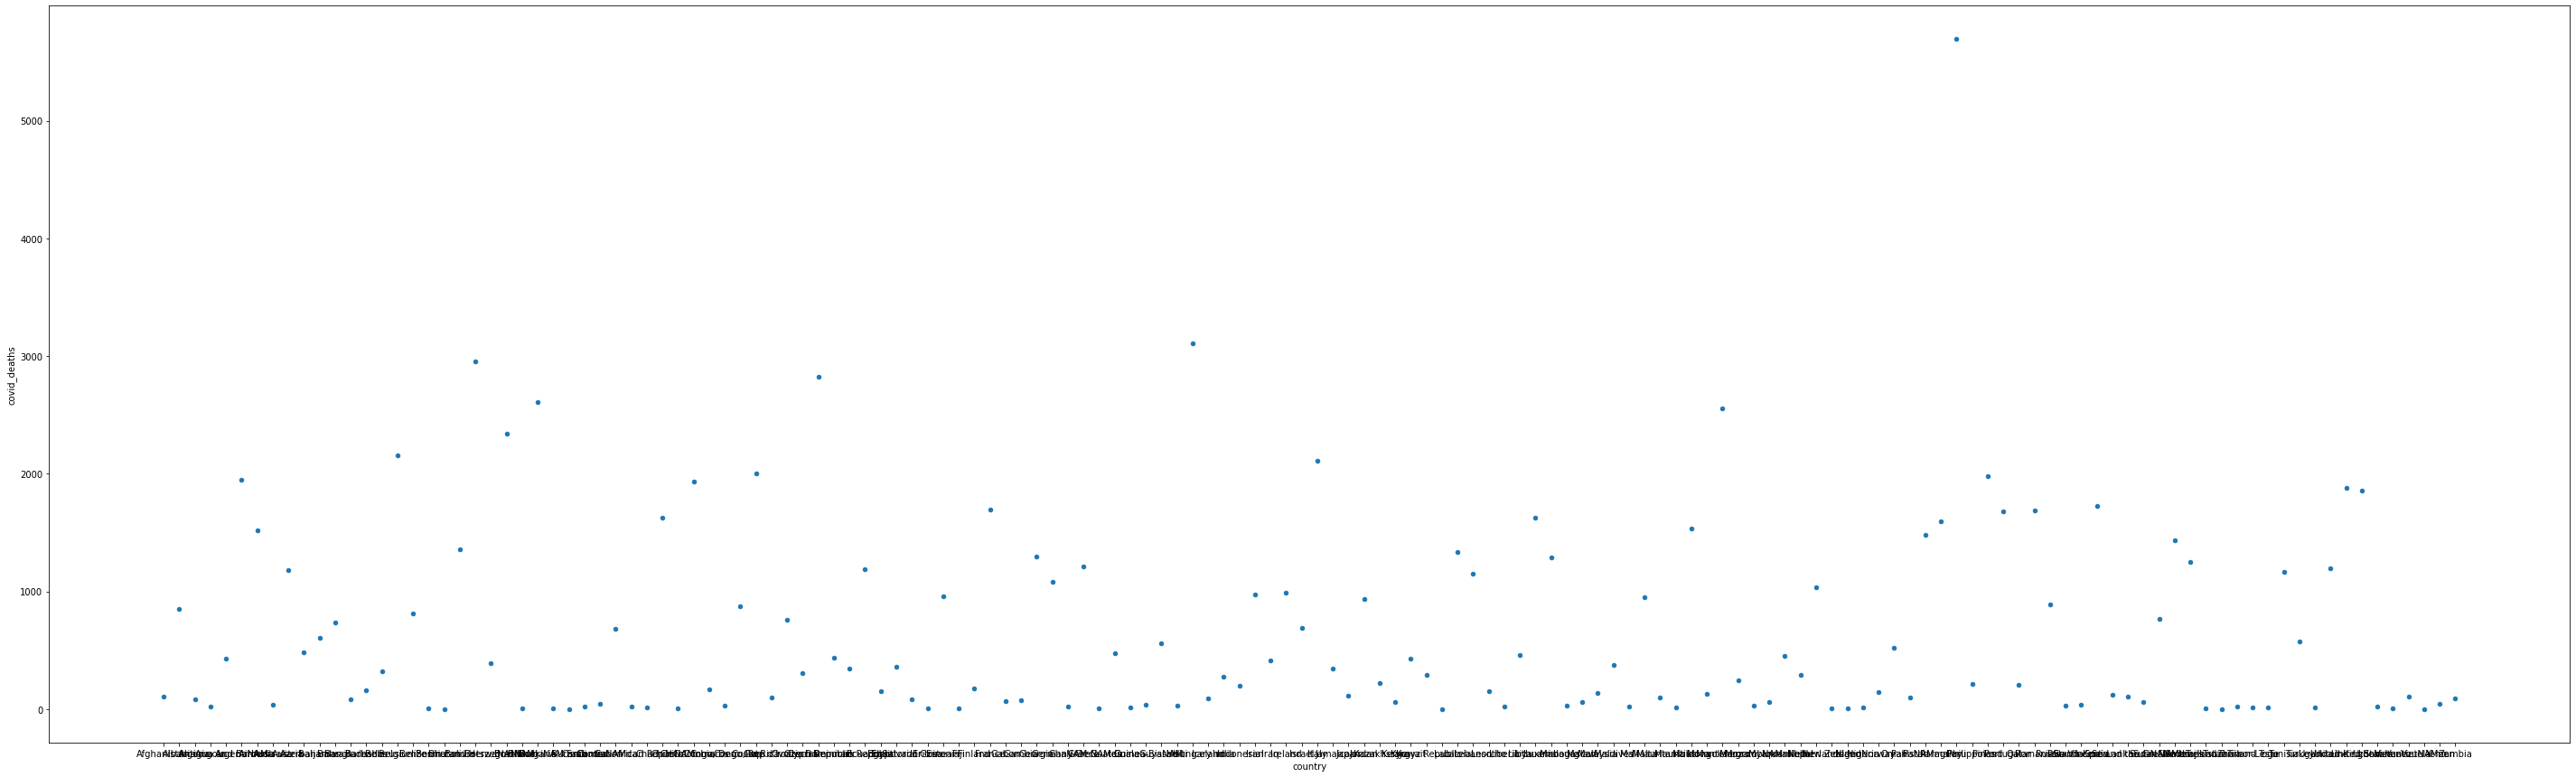

In [10]:
# visualizing the data using scatter plots
# visualizing the geographical data using a scatterplot
# map plot would do better here
covid.plot(kind="scatter", x="country", y="covid_deaths", figsize=(50,15))

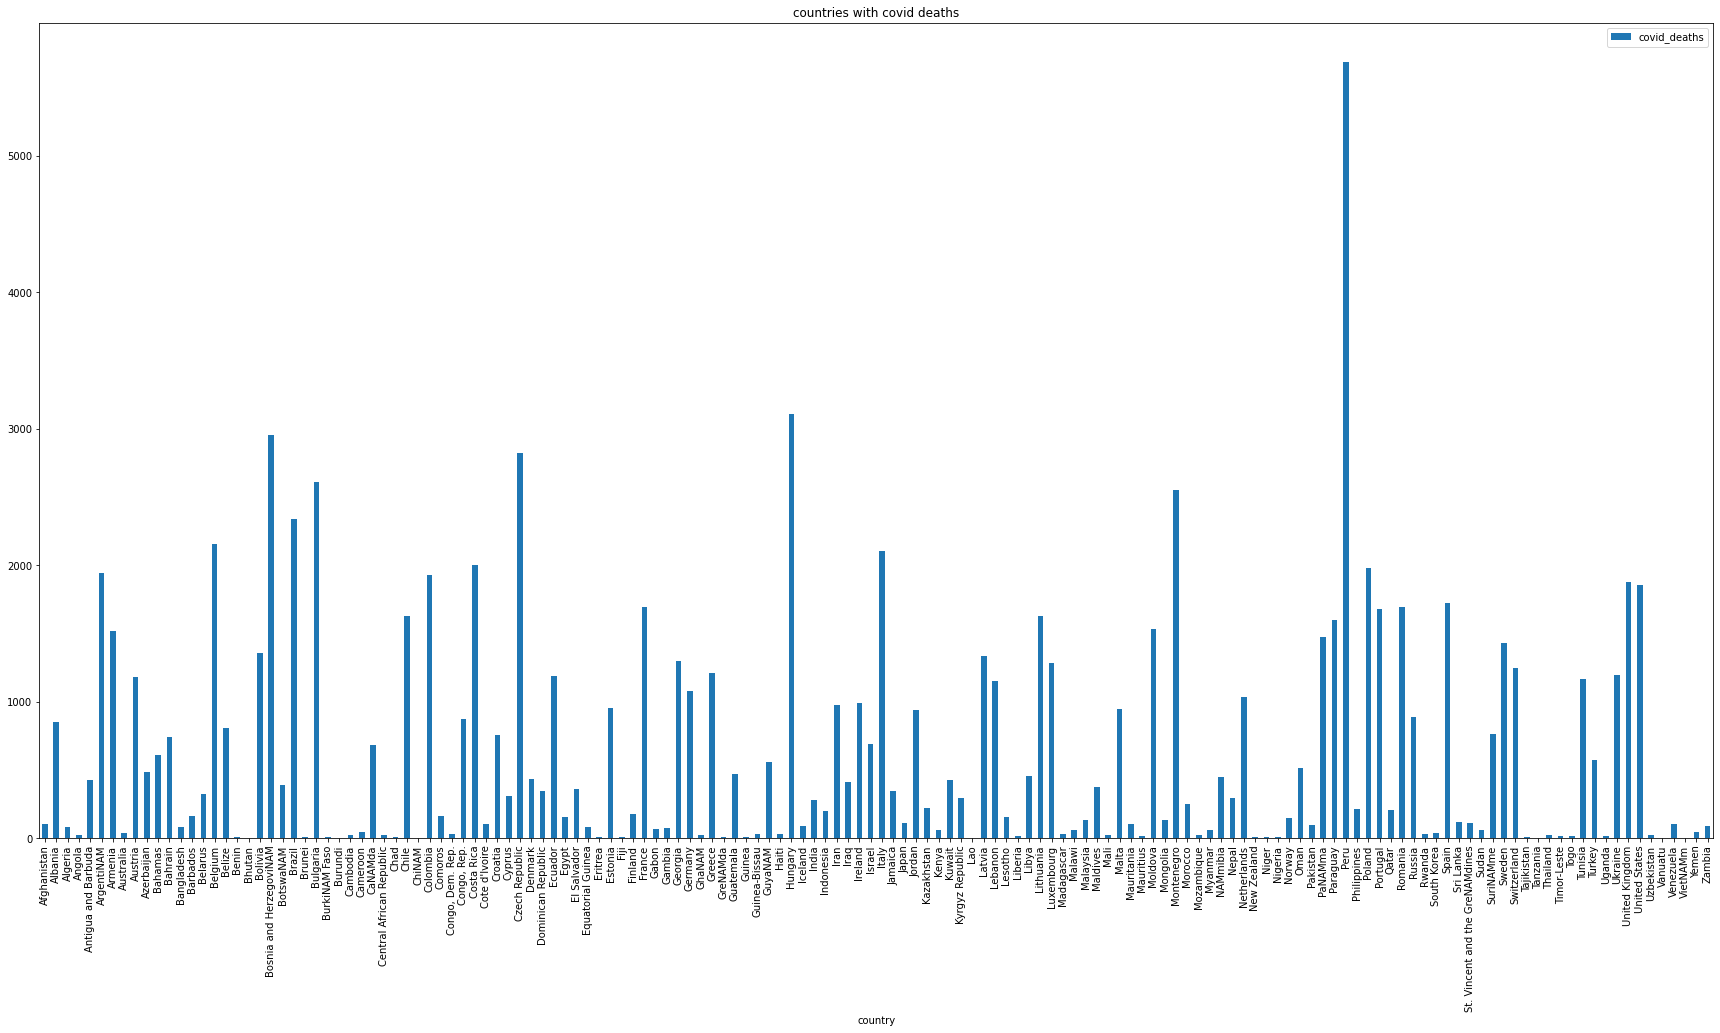

In [11]:
# covid deaths per country plot

# plt.xlabel("Location", fontsize = 14)
# plt.ylabel("covid deaths", fontsize = 14)
covid.plot(kind='bar', title= "countries with covid deaths", y="covid_deaths", x="country", figsize=(30,15))

{'boxes': [<matplotlib.lines.Line2D at 0x7fdf6b199110>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdf6b1c0290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf6b1b62d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf6b1c0d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdf6b199890>,
  <matplotlib.lines.Line2D at 0x7fdf6b199350>]}

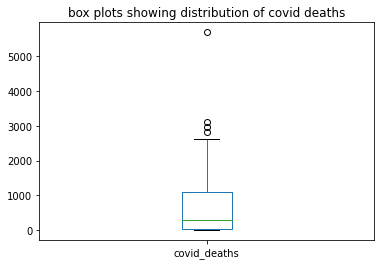

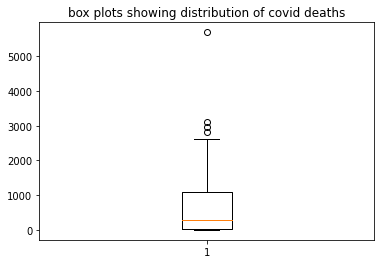

In [12]:
# Box plots 
# box plot1
covid.plot(kind='box', title= "box plots showing distribution of covid deaths", y="covid_deaths", x="country")

# box plot2 
fig1, ax1 = plt.subplots()
ax1.set_title("box plots showing distribution of covid deaths")
ax1.boxplot(covid["covid_deaths"])

**Implementing clustering with the first 10 variables**

In [13]:
# copy of the dataset
covid_copy = covid.copy()
covid_copy.head()

,Unnamed: 0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pop_dens,continent,covid_deaths
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,49,AS,104.0
1,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,99,EU,854.0
2,3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,18,AF,81.0
3,4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,23,AF,25.0
4,5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,235,NAM,425.0


In [14]:
# dropping unwanted columns from the dataset
# dropping continent and covid deaths
covid1 = covid_copy.drop(["continent","covid_deaths", "country"],  axis=1)
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  148 non-null    int64  
 1   child_mort  148 non-null    float64
 2   exports     148 non-null    float64
 3   health      148 non-null    float64
 4   imports     148 non-null    float64
 5   income      148 non-null    int64  
 6   inflation   148 non-null    float64
 7   life_expec  148 non-null    float64
 8   total_fer   148 non-null    float64
 9   gdpp        148 non-null    int64  
 10  pop_dens    148 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 12.8 KB


In [15]:
covid1.head()

,Unnamed: 0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pop_dens
0,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,49
1,2,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,99
2,3,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,18
3,4,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,23
4,5,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,235


In [18]:
# using the dataset with dropped columns
# lets try to fit to a clustering algorithm
# clustering 
from sklearn.cluster import KMeans
from sklearn import metrics

kmodel = KMeans(n_clusters=3, random_state=1)
kmodel.fit(covid1)
labels = kmodel.labels_
metrics.silhouette_score(covid1, labels, metric='euclidean')

0.7076253271827981

In [19]:
# create a copy
covid_copy2 = covid_copy.copy()
covid_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    148 non-null    int64  
 1   country       148 non-null    object 
 2   child_mort    148 non-null    float64
 3   exports       148 non-null    float64
 4   health        148 non-null    float64
 5   imports       148 non-null    float64
 6   income        148 non-null    int64  
 7   inflation     148 non-null    float64
 8   life_expec    148 non-null    float64
 9   total_fer     148 non-null    float64
 10  gdpp          148 non-null    int64  
 11  pop_dens      148 non-null    int64  
 12  continent     148 non-null    object 
 13  covid_deaths  148 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 16.3+ KB


In [20]:
# lets now turn country column to a way that the models can understand 
# working  with numbers 
# using scikit label encoder 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
covid_copy["country"] = encoder.fit_transform(covid_copy["country"])
covid_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    148 non-null    int64  
 1   country       148 non-null    int64  
 2   child_mort    148 non-null    float64
 3   exports       148 non-null    float64
 4   health        148 non-null    float64
 5   imports       148 non-null    float64
 6   income        148 non-null    int64  
 7   inflation     148 non-null    float64
 8   life_expec    148 non-null    float64
 9   total_fer     148 non-null    float64
 10  gdpp          148 non-null    int64  
 11  pop_dens      148 non-null    int64  
 12  continent     148 non-null    object 
 13  covid_deaths  148 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory usage: 16.3+ KB


In [21]:
# look at encoded classes
print(encoder.classes_)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'ArgentiNAM' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and HerzegoviNAM' 'BotswaNAM' 'Brazil'
 'Brunei' 'Bulgaria' 'BurkiNAM Faso' 'Burundi' 'CaNAMda' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'ChiNAM' 'Chile' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'GhaNAM'
 'GreNAMda' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'GuyaNAM'
 'Haiti' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuan

In [22]:
# lets now drop continent and covid deaths columns
covid2 = covid_copy.drop(["continent","covid_deaths"],  axis=1)
covid2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  148 non-null    int64  
 1   country     148 non-null    int64  
 2   child_mort  148 non-null    float64
 3   exports     148 non-null    float64
 4   health      148 non-null    float64
 5   imports     148 non-null    float64
 6   income      148 non-null    int64  
 7   inflation   148 non-null    float64
 8   life_expec  148 non-null    float64
 9   total_fer   148 non-null    float64
 10  gdpp        148 non-null    int64  
 11  pop_dens    148 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 14.0 KB


In [23]:
# using the dataset with dropped columns and labelecoded
# lets try to fit to KMeans
# training kmeans to learn clusters on the dataset
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=3, random_state=42, init = 'k-means++')
kmodel.fit(covid2)
labels = kmodel.labels_
metrics.silhouette_score(covid2, labels, metric='euclidean')

0.7076146396839857

In [24]:
wcss=[]
wcss.append(kmodel.inertia_)
wcss

[19151897782.112946]

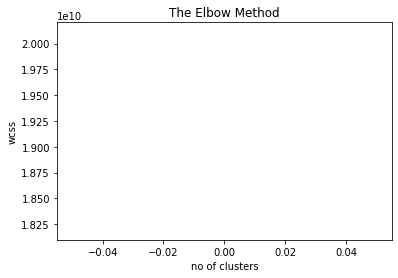

In [36]:
# lets now plot the clusters
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [41]:
kmodel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(covid2)
y_kmeans

array([0, 0, 3, 0, 3, 3, 0, 1, 1, 3, 2, 2, 0, 3, 3, 1, 0, 0, 0, 0, 0, 3,
       3, 1, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 2, 2, 1,
       3, 0, 0, 0, 2, 0, 3, 0, 1, 1, 3, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 3, 3, 1, 2, 2, 0, 1, 0, 3, 0, 1, 0, 0, 3, 3, 0, 0, 3,
       3, 4, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       4, 2, 0, 3, 0, 0, 0, 3, 2, 4, 3, 3, 0, 2, 2, 0, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0], dtype=int32)

In [42]:
# Visualising the clusters
plt.scatter(covid2[y_kmeans == 0, 0], covid2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(covid2[y_kmeans == 1, 0], covid2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(covid2[y_kmeans == 2, 0], covid2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(covid2[y_kmeans == 3, 0], covid2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(covid2[y_kmeans == 4, 0], covid2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmodel.cluster_centers_[:, 0], kmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of covid_death')
plt.legend()
plt.show()


TypeError: ignored

**Transforming covid deaths into binary variable and fittting Logistic regression**

In [45]:
covid_copy2.head()

,Unnamed: 0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pop_dens,continent,covid_deaths
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,49,AS,104.0
1,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,99,EU,854.0
2,3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,18,AF,81.0
3,4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,23,AF,25.0
4,5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,235,NAM,425.0


In [75]:
# tranforming covid deaths to a binary variable
y = covid_copy2["covid_deaths"]
covid_binary = pd.get_dummies(covid_copy2["covid_deaths"])
print(covid_binary)

     0.3     0.4     0.7     1.0     ...  2822.0  2953.0  3108.0  5692.0
0         0       0       0       0  ...       0       0       0       0
1         0       0       0       0  ...       0       0       0       0
2         0       0       0       0  ...       0       0       0       0
3         0       0       0       0  ...       0       0       0       0
4         0       0       0       0  ...       0       0       0       0
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
143       0       0       0       0  ...       0       0       0       0
144       0       0       0       0  ...       0       0       0       0
145       0       0       1       0  ...       0       0       0       0
146       0       0       0       0  ...       0       0       0       0
147       0       0       0       0  ...       0       0       0       0

[148 rows x 129 columns]


In [71]:
# trying to use scikit learn labelbinarizer
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(covid_copy2["covid_deaths"])
covid1_binary = lb.transform(covid_copy2["covid_deaths"])

ValueError: ignored

In [55]:
# scikit label binarizer does not seem to work
# using pandas dataframe one
# now covid_deaths has been tranformed to a binary varible
# lets now drop it from the original dataset along with continent 
covid3 = covid_copy2.drop(["covid_deaths", "continent"], axis=1)
covid3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  148 non-null    int64  
 1   country     148 non-null    object 
 2   child_mort  148 non-null    float64
 3   exports     148 non-null    float64
 4   health      148 non-null    float64
 5   imports     148 non-null    float64
 6   income      148 non-null    int64  
 7   inflation   148 non-null    float64
 8   life_expec  148 non-null    float64
 9   total_fer   148 non-null    float64
 10  gdpp        148 non-null    int64  
 11  pop_dens    148 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 14.0+ KB


In [56]:
# we now have the 11 varibles we need
# lets transform country to interger before fitting to logistic regression 
covid3["country"] = encoder.fit_transform(covid3["country"])
covid3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  148 non-null    int64  
 1   country     148 non-null    int64  
 2   child_mort  148 non-null    float64
 3   exports     148 non-null    float64
 4   health      148 non-null    float64
 5   imports     148 non-null    float64
 6   income      148 non-null    int64  
 7   inflation   148 non-null    float64
 8   life_expec  148 non-null    float64
 9   total_fer   148 non-null    float64
 10  gdpp        148 non-null    int64  
 11  pop_dens    148 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 14.0 KB


In [62]:
y

0      104.0
1      854.0
2       81.0
3       25.0
4      425.0
       ...  
143      3.0
144    104.0
145      0.7
146     44.0
147     87.0
Name: covid_deaths, Length: 148, dtype: float64

In [78]:
# now the data is ready
# fitting logistic regression to the remaining 10 variables 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(covid3, covid_binary)

ValueError: ignored

**Transforming covid deaths to categorical varibles with 4 possible labels**

In [82]:
# transforming covid deaths into categorical variables with 4 possible labels
covid_trans = pd.get_dummies(covid_binary).columns
covid_trans


Float64Index([   0.3,    0.4,    0.7,    1.0,    3.0,    5.0,    7.0,    8.0,
                 9.0,   10.0,
              ...
              2003.0, 2108.0, 2159.0, 2340.0, 2555.0, 2608.0, 2822.0, 2953.0,
              3108.0, 5692.0],
             dtype='float64', length=129)

In [88]:
# covid_deaths is now tranformed to categorical varibles
# lets now try it on QDA algorithm 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(covid3,covid_trans)


ValueError: ignored

In [90]:
# dataset bringing lots of errors 
# trying LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(covid3, covid_trans)

ValueError: ignored

In [91]:
# trying logistic on the categorical data
clf = LogisticRegression(random_state=0).fit(covid3, covid_trans)

ValueError: ignored